# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import date

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
temp_max = []
city_lon = []
city_lat = []
city_humid = []
city_cloud = []
city_wind = []
city_country = []
city_date = []
city_name = []

response = requests.get(query_url + "chicago").json()
response["dt"]

city_group = 1
city_count = 1
print("Beginning Data Retrieval")
print("------------------------------------")
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        
        temp_max.append(response["main"]["temp_max"])
        city_lon.append(response["coord"]["lon"])
        city_lat.append(response["coord"]["lat"])
        city_humid.append(response["main"]["humidity"])
        city_cloud.append(response["clouds"]["all"])
        city_wind.append(response["wind"]["speed"])
        city_country.append(response["sys"]["country"])
        city_date.append(response["dt"])
        city_name.append(city)
        if city_count < 50:
            city_count +=1
        else:
            city_count = 1
            city_group +=1

        print(f"Processsing Record {city_count} of Set {city_group} | {city}")
    except:
        print("City Not Found")
print("--------------------------------")
print("End Data Retrieval")

run_date = date.today()


Beginning Data Retrieval
------------------------------------
Processsing Record 2 of Set 1 | hobart
Processsing Record 3 of Set 1 | vaini
Processsing Record 4 of Set 1 | punta arenas
Processsing Record 5 of Set 1 | mataura
Processsing Record 6 of Set 1 | busselton
Processsing Record 7 of Set 1 | san quintin
Processsing Record 8 of Set 1 | swift current
Processsing Record 9 of Set 1 | saldanha
Processsing Record 10 of Set 1 | hithadhoo
Processsing Record 11 of Set 1 | airai
City Not Found
Processsing Record 12 of Set 1 | esperance
Processsing Record 13 of Set 1 | saint-philippe
Processsing Record 14 of Set 1 | chuy
Processsing Record 15 of Set 1 | villazon
Processsing Record 16 of Set 1 | jamestown
Processsing Record 17 of Set 1 | avarua
Processsing Record 18 of Set 1 | kruisfontein
Processsing Record 19 of Set 1 | tigre
Processsing Record 20 of Set 1 | kieta
Processsing Record 21 of Set 1 | lompoc
Processsing Record 22 of Set 1 | bredasdorp
Processsing Record 23 of Set 1 | arraial do 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_df = pd.DataFrame({
    "City": city_name,
    "Lat": city_lat,
    "Lng": city_lon,
    "Max Temp": temp_max,
    "Humidity": city_humid,
    "Cloudiness": city_cloud,
    "Wind Speed": city_wind,
    "Country": city_country,
    "Date": city_date
})

city_df.to_csv("Output/city_pull_data.csv", index=False, header=True)
city_df.head()



,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hobart,-42.8794,147.3294,57.25,64,75,5.99,AU,1627436894
1,vaini,-21.2000,-175.2000,69.96,83,75,8.05,TO,1627436906
2,punta arenas,-53.1500,-70.9167,44.71,81,75,23.02,CL,1627436906
3,mataura,-46.1927,168.8643,52.48,74,68,1.28,NZ,1627436906
4,busselton,-33.6500,115.3333,55.04,67,65,16.64,AU,1627436907


In [6]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,5.460000e+02
mean,18.831061,20.875536,69.366795,70.882784,52.485348,8.016557,1.627437e+09
std,33.493731,91.016576,13.863590,19.922718,40.033023,5.586607,9.638547e+01
min,-54.800000,-175.200000,33.800000,10.000000,0.000000,0.000000,1.627436e+09
25%,-9.045625,-59.420825,60.430000,60.000000,8.000000,3.745000,1.627437e+09
50%,21.482000,27.539150,72.020000,74.500000,55.000000,6.900000,1.627437e+09
75%,47.686475,100.349575,79.837500,85.750000,96.000000,11.500000,1.627437e+09
max,78.218600,179.316700,99.050000,100.000000,100.000000,27.540000,1.627437e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
humid_outlier = city_df.loc[city_df["Humidity"]>100]
humid_outlier
if len(humid_outlier) > 0:
    print("You need to remove humid outliers")
else:
    print("No humid outliers")

No humid outliers


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

### Analysis - The max mean temperature seems to be aroun 20 degrees as the Latitude moves in either direction from that the average Max temperature begins to fall 

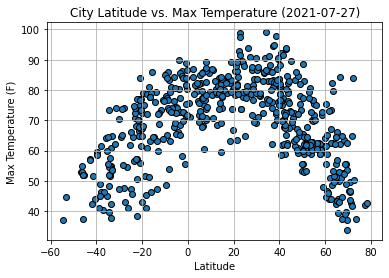

In [8]:
x_axis = city_df["Lat"]
y_axis = city_df["Max Temp"]
plt.scatter(x_axis, y_axis, edgecolors="black")
plt.grid("True")
plt.title(f"City Latitude vs. Max Temperature ({run_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig('Output/LatvTemp.png')

## Latitude vs. Humidity Plot

### Analysis - Latitude does not seem to have any correlation to Humidity but there seems to be more variance from 20-40 degrees as of the run date

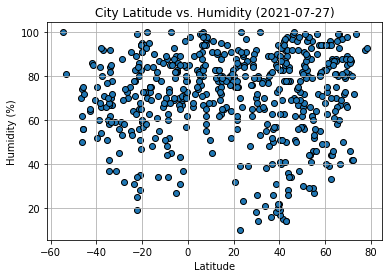

In [9]:
x_axis = city_df["Lat"]
y_axis = city_df["Humidity"]
plt.scatter(x_axis, y_axis, edgecolors="black")
plt.grid("True")
plt.title(f"City Latitude vs. Humidity ({run_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig('Output/LatvHumid.png')

## Latitude vs. Cloudiness Plot

### Analysis - Latitude does not seem to have any correlation to Cloudiness though it is interesting that there were 0 cities in the latitude 0-20 that had 0 cloudiness

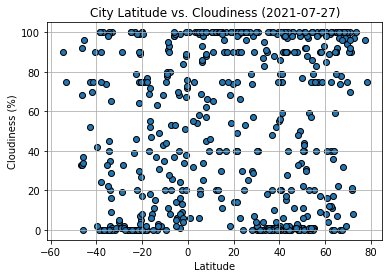

In [10]:
x_axis = city_df["Lat"]
y_axis = city_df["Cloudiness"]
plt.scatter(x_axis, y_axis, edgecolors="black")
plt.grid("True")
plt.title(f"City Latitude vs. Cloudiness ({run_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig('Output/LatvCloud.png')

## Latitude vs. Wind Speed Plot

### Analysis - Wind Speed did not appear to be cordinate and most cities tend to be under 10 mph

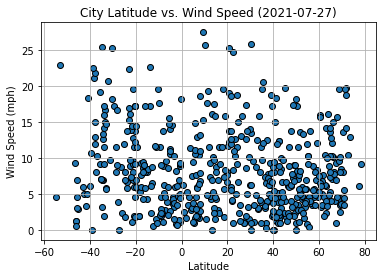

In [11]:
x_axis = city_df["Lat"]
y_axis = city_df["Wind Speed"]
plt.scatter(x_axis, y_axis, edgecolors="black")
plt.grid("True")
plt.title(f"City Latitude vs. Wind Speed ({run_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig('Output/LatvWind.png')

## Linear Regression

In [12]:
#set Nothern and Southern Hemispheres
north_city_df =  city_df.loc[city_df["Lat"]>0]
south_city_df =  city_df.loc[city_df["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

#### Analysis - There appears to be a negative corelation between Lat and Temp in the Northern Hemisphere

The R Squared Value is: 0.41736677237527015


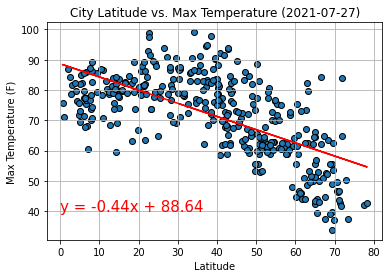

In [13]:
x_axis = north_city_df["Lat"]
y_axis = north_city_df["Max Temp"]
plt.scatter(x_axis, y_axis, edgecolors="black")
plt.grid("True")
plt.title(f"City Latitude vs. Max Temperature ({run_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="red")
plt.savefig('Output/NTempVsLat.png')

print(f"The R Squared Value is: {rvalue**2}")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

#### Analysis - There appears to be a postive corelation between Lat and Temp in the Southern Hemisphere as it moves toward the equation

The R Squared Value is: 0.46081566948079694


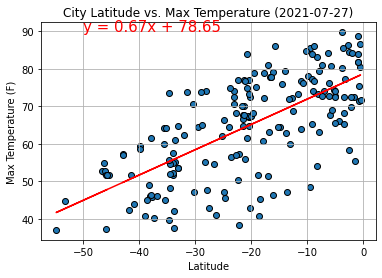

In [15]:
x_axis = south_city_df["Lat"]
y_axis = south_city_df["Max Temp"]
plt.scatter(x_axis, y_axis, edgecolors="black")
plt.grid("True")
plt.title(f"City Latitude vs. Max Temperature ({run_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.savefig('Output/STempVsLat.png')


print(f"The R Squared Value is: {rvalue**2}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

#### Analysis - There is not much correlation but there is high variance in Lat 20-50

The R Squared Value is: 0.004996423302395657


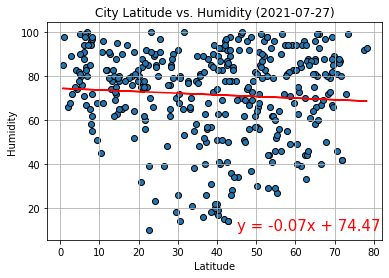

In [16]:
x_axis = north_city_df["Lat"]
y_axis = north_city_df["Humidity"]
plt.scatter(x_axis, y_axis, edgecolors="black")
plt.grid("True")
plt.title(f"City Latitude vs. Humidity ({run_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.savefig('Output/NHumidVsLat.png')


print(f"The R Squared Value is: {rvalue**2}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

#### Analysis - There is not much correlation but there is high variance in Lat -30 and -20

The R Squared Value is: 0.00305868207795234


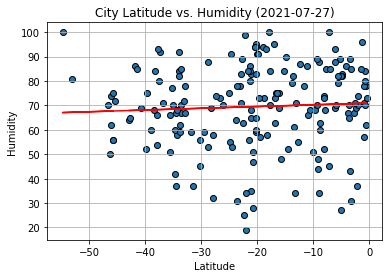

In [17]:
x_axis = south_city_df["Lat"]
y_axis = south_city_df["Humidity"]
plt.scatter(x_axis, y_axis, edgecolors="black")
plt.grid("True")
plt.title(f"City Latitude vs. Humidity ({run_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.savefig('Output/SHumidVsLat.png')

print(f"The R Squared Value is: {rvalue**2}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

#### Analysis - Most cities in the North had cloudiness but from 30-50 there was a higher percentage with clear skys

The R Squared Value is: 0.0057976429948805265


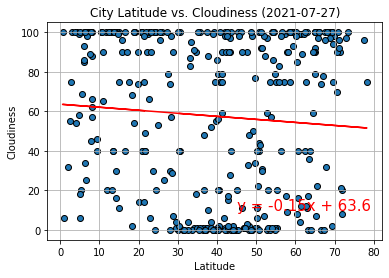

In [18]:
x_axis = north_city_df["Lat"]
y_axis = north_city_df["Cloudiness"]
plt.scatter(x_axis, y_axis, edgecolors="black")
plt.grid("True")
plt.title(f"City Latitude vs. Cloudiness ({run_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.savefig('Output/NCloudVsLat.png')

print(f"The R Squared Value is: {rvalue**2}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

#### Analysis - There is no correlaion in the southern hemisphere

The R Squared Value is: 1.6198585176273233e-06


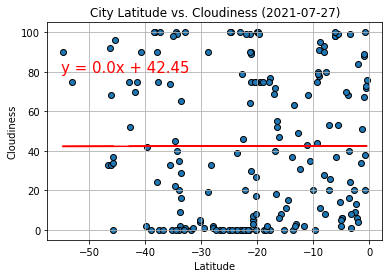

In [19]:
x_axis = south_city_df["Lat"]
y_axis = south_city_df["Cloudiness"]
plt.scatter(x_axis, y_axis, edgecolors="black")
plt.grid("True")
plt.title(f"City Latitude vs. Cloudiness ({run_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")
plt.savefig('Output/SCloudVsLat.png')

print(f"The R Squared Value is: {rvalue**2}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

#### Analysis - There isnt much correlation for wind speed in the northern hemisphere

The R Squared Value is: 0.0007761241663579467


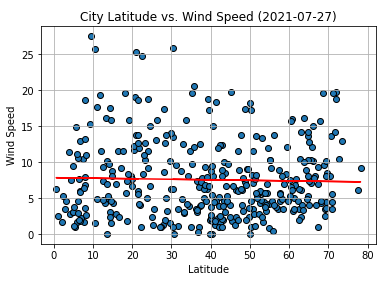

In [20]:
x_axis = north_city_df["Lat"]
y_axis = north_city_df["Wind Speed"]
plt.scatter(x_axis, y_axis, edgecolors="black")
plt.grid("True")
plt.title(f"City Latitude vs. Wind Speed ({run_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.savefig('Output/NWindVsLat.png')

print(f"The R Squared Value is: {rvalue**2}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

#### Analysis - There isnt much correlation for wind speed in the southern hemisphere

The R Squared Value is: 0.045214119970379746


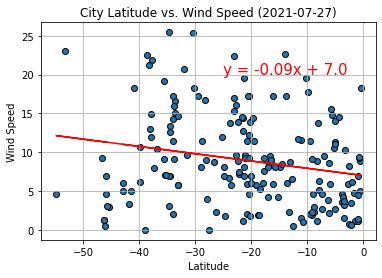

In [21]:
x_axis = south_city_df["Lat"]
y_axis = south_city_df["Wind Speed"]
plt.scatter(x_axis, y_axis, edgecolors="black")
plt.grid("True")
plt.title(f"City Latitude vs. Wind Speed ({run_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-25,20),fontsize=15,color="red")
plt.savefig('Output/SWindVsLat.png')

print(f"The R Squared Value is: {rvalue**2}")